
<h2 style="color:MediumSeaGreen;">Download thumbnails of a channel or playlist or a video from youtube </h2>

In [1]:
#package dependencies
#!pip install youtube_dl
#!pip install requests
#pip install pandas

In [2]:
import youtube_dl
import requests
import pandas as pd

In [3]:
CHANNEL_URL='https://www.youtube.com/c/Freecodecamp' # :)
#get channel video in a list
#videos_in_a_channel=!youtube-dl --get-id --skip-download --get-thumbnail --dateafter 20211001 https://www.youtube.com/c/Freecodecamp
videos_in_a_playlist=!youtube-dl --get-id --skip-download --get-thumbnail  \
    https://www.youtube.com/playlist\?list=PLWKjhJtqVAblvI1i46ScbKV2jH1gdL7VQ

print(f"Total videos in a channel/playlist are:{len(videos_in_a_playlist)} and first three ids/urls are {videos_in_a_playlist[:3]}")

Total videos in a channel/playlist are:12 and first three ids/urls are ['EsDFiZPljYo', 'https://i.ytimg.com/vi/EsDFiZPljYo/maxresdefault.jpg?v=5f356909', 'JOKJ6g3gUFE']


In [4]:
video_meta_data_list=[]
ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    for vid in videos_in_a_playlist:
        if "https" in vid:
            continue
        else:
            data=ydl.extract_info(f'https://www.youtube.com/watch?v={vid}',download=False)
            video_meta_data_list.append({
            "id":vid,
            "title":data['title'],
            "upload_date":data["upload_date"],
            "like_count":data['like_count'],
            "dislike_count": data['dislike_count'],
            "view_count":data['view_count'],
            "thumbnail":data['thumbnail']
            })

[youtube] EsDFiZPljYo: Downloading webpage
[youtube] JOKJ6g3gUFE: Downloading webpage
[youtube] NlZXAytUeeE: Downloading webpage
[youtube] b2mLDkMSyn4: Downloading webpage
[youtube] bybjFBOBJlg: Downloading webpage
[youtube] XRKIa4k0h2E: Downloading webpage


In [5]:
df=pd.DataFrame(video_meta_data_list)
df.head(10)

,id,title,upload_date,like_count,dislike_count,view_count,thumbnail
0,EsDFiZPljYo,Data Analysis with Python: Part 1 of 6 (Live C...,20200815,6031,97,279638,https://i.ytimg.com/vi/EsDFiZPljYo/maxresdefau...
1,JOKJ6g3gUFE,Data Analysis with Python: Part 2 of 6 - Pytho...,20200822,1861,36,92518,https://i.ytimg.com/vi/JOKJ6g3gUFE/maxresdefau...
2,NlZXAytUeeE,Data Analysis with Python: Part 3 of 6 Numeric...,20200829,1500,26,70898,https://i.ytimg.com/vi/NlZXAytUeeE/maxresdefau...
3,b2mLDkMSyn4,Data Analysis with Python: Part 4 of 6 - Analy...,20200905,1204,32,54178,https://i.ytimg.com/vi/b2mLDkMSyn4/maxresdefau...
4,bybjFBOBJlg,Data Analysis with Python: Part 5 of 6 - Visua...,20200912,1213,15,52488,https://i.ytimg.com/vi/bybjFBOBJlg/maxresdefau...
5,XRKIa4k0h2E,Data Analysis with Python: Part 6 of 6 - Explo...,20200919,1246,27,55298,https://i.ytimg.com/vi/XRKIa4k0h2E/maxresdefau...


In [7]:
# Create thumbnail folder
import os
cwd=os.getcwd()
data_image_folder=os.path.join(cwd,"thumbnail_images")
if not os.path.exists(data_image_folder):
    os.makedirs(data_image_folder)

In [8]:
import concurrent.futures

In [9]:
def download_image(url_vid,data_folder=data_image_folder):
    img_url=url_vid[0]
    vid_id=url_vid[1]
    img_bytes= requests.get(img_url).content
    img_name=f'{vid_id}.jpg'
    with open(os.path.join(data_folder,img_name),"wb") as img_file:
        img_file.write(img_bytes)

In [10]:
# download the tumbnails, using thread
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(download_image,zip(df['thumbnail'],df['id']))  
    for result in results:
        pass


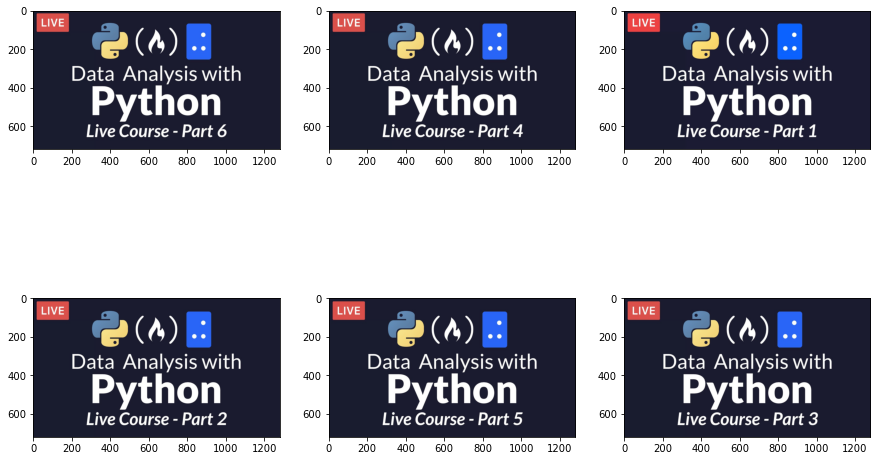

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0 = mpimg.imread(os.path.join(os.getcwd(),data_image_folder,os.listdir(data_image_folder)[0]))
img1 = mpimg.imread(os.path.join(os.getcwd(),data_image_folder,os.listdir(data_image_folder)[1]))

fig = plt.figure(figsize=(15,15))
for i in range(0,6):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(mpimg.imread(os.path.join(os.getcwd(),data_image_folder,os.listdir(data_image_folder)[i])))
    

In [12]:
df.to_csv("youtube_data_raw.csv")

In [13]:
df.describe()

,like_count,dislike_count,view_count
count,6.000000,6.000000,6.000000
mean,2175.833333,38.833333,100836.333333
std,1905.480456,29.362675,88908.757368
min,1204.000000,15.000000,52488.000000
25%,1221.250000,26.250000,54458.000000
50%,1373.000000,29.500000,63098.000000
75%,1770.750000,35.000000,87113.000000
max,6031.000000,97.000000,279638.000000
